In [11]:
import sys
sys.path.insert(0, '..')

import numpy as np
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

%load_ext autoreload
%autoreload 1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# From pipeline to pandas

Get experimental results in a neat pandas DataFrame with performance metrics as columns and experimental specifications as rows.

In [2]:
%aimport pipeline

DF = pipeline.main()

{'add_bias': True,
 'attack': <module 'attacks.ham' from '../attacks/ham.py'>,
 'attack_parameters': {'percentage_samples_poisoned': 0},
 'classifier': <module 'classifiers.adaline' from '../classifiers/adaline.py'>,
 'dataset': 'trec2007',
 'dataset_filename': 'trec2007-1607201347',
 'iteration': 1,
 'label_type': {'ham_label': -1, 'spam_label': 1},
 'testing_parameters': {'ham_label': -1},
 'training_parameters': {'ham_label': -1}}
iteration 1:	cost = 1.000
iteration 2:	cost = 0.905
iteration 3:	cost = 0.834
iteration 4:	cost = 0.781
iteration 5:	cost = 0.740
iteration 6:	cost = 0.708
iteration 7:	cost = 0.682
iteration 8:	cost = 0.660
iteration 9:	cost = 0.641
iteration 10:	cost = 0.625
iteration 11:	cost = 0.611
iteration 12:	cost = 0.598
iteration 13:	cost = 0.587
iteration 14:	cost = 0.576
iteration 15:	cost = 0.567
iteration 16:	cost = 0.558
iteration 17:	cost = 0.549
iteration 18:	cost = 0.542
iteration 19:	cost = 0.535
iteration 20:	cost = 0.528
{'AUC': 0.625,
 'FNR': 0.0,
 'F

In [93]:
df = DF.reorder_levels(['classifier', 'attack', 'percentage_samples_poisoned', 'iteration']).sort_index()
df.columns.names = ['metrics']
df

metrics                                                        AUC       FNR  \
classifier  attack percentage_samples_poisoned iteration                       
adaline     empty  0.0                         1          0.569565  0.000000   
                                               2          0.580357  0.000000   
                                               3          0.580189  0.000000   
                                               4          0.567308  0.000000   
                                               5          0.616391  0.002513   
                                               6          0.576923  0.000000   
                                               7          0.626316  0.000000   
                                               8          0.601942  0.000000   
                                               9          0.597222  0.000000   
                                               10         0.566372  0.000000   
                   0.1                         1          0.597222  0.000000   
                                               2          0.549107  0.000000   
                                               3          0.546296  0.000000   
                                               4          0.564815  0.000000   
                                               5          0.543269  0.000000   
                                               6          0.556075  0.000000   
                                               7          0.566667  0.000000   
                                               8          0.577670  0.000000   
                                               9          0.516667  0.000000   
                                               10         0.551887  0.000000   
                   0.2                         1          0.534783  0.000000   
                                               2          0.542056  0.000000   
                                               3          0.531532  0.000000   
                                               4          0.516529  0.000000   
                                               5          0.549020  0.000000   
                                               6          0.545455  0.000000   
                                               7          0.574257  0.000000   
                                               8          0.569307  0.000000   
                                               9          0.512605  0.000000   
                                               10         0.542857  0.000000   
...                                                            ...       ...   
naive bayes ham    0.3                         1          0.739427  0.026764   
                                               2          0.719352  0.032995   
                                               3          0.709801  0.030848   
                                               4          0.726535  0.055263   
                                               5          0.755789  0.027638   
                                               6          0.740919  0.027778   
                                               7          0.731324  0.027919   
                                               8          0.719860  0.051020   
                                               9          0.734168  0.017903   
                                               10         0.756259  0.023196   
                   0.4                         1          0.716978  0.038265   
                                               2          0.759985  0.017766   
                                               3          0.750534  0.027778   
                                               4          0.764667  0.012723   
                                               5          0.731338  0.015584   
                                               6          0.714474  0.021053   
                                               7          0.759578  0.022901   


In [94]:
df_mean = df.mean(level=df.index.names[:-1])
df_mean

metrics                                              AUC       FNR       FPR  \
classifier  attack percentage_samples_poisoned                                 
adaline     empty  0.0                          0.588258  0.000251  0.823232   
                   0.1                          0.556967  0.000000  0.886065   
                   0.2                          0.541840  0.000000  0.916320   
                   0.3                          0.521371  0.000000  0.957257   
                   0.4                          0.516436  0.000000  0.967128   
                   0.5                          0.514543  0.000000  0.970914   
            ham    0.0                          0.583667  0.000000  0.832665   
                   0.1                          0.559620  0.000000  0.880759   
                   0.2                          0.539232  0.000000  0.921536   
                   0.3                          0.523529  0.000000  0.952942   
                   0.4                          0.520226  0.000000  0.959547   
                   0.5                          0.510282  0.000000  0.979437   
naive bayes empty  0.0                          0.740954  0.025474  0.492619   
                   0.1                          0.744276  0.028954  0.482494   
                   0.2                          0.728110  0.025790  0.517990   
                   0.3                          0.731545  0.027047  0.509863   
                   0.4                          0.743858  0.026729  0.485555   
                   0.5                          0.729004  0.033987  0.508005   
            ham    0.0                          0.732018  0.024030  0.511935   
                   0.1                          0.735407  0.024467  0.504720   
                   0.2                          0.737030  0.029453  0.496487   
                   0.3                          0.733343  0.032132  0.501181   
                   0.4                          0.741938  0.026111  0.490014   
                   0.5                          0.732494  0.033378  0.501634   

metrics                                         error_test  error_train  
classifier  attack percentage_samples_poisoned                           
adaline     empty  0.0                              0.1776       0.1732  
                   0.1                              0.1918       0.1718  
                   0.2                              0.2006       0.1602  
                   0.3                              0.2114       0.1500  
                   0.4                              0.2100       0.1400  
                   0.5                              0.2134       0.1304  
            ham    0.0                              0.1872       0.1736  
                   0.1                              0.1900       0.1632  
                   0.2                              0.2028       0.1536  
                   0.3                              0.2072       0.1414  
                   0.4                              0.2068       0.1432  
                   0.5                              0.2130       0.1264  
naive bayes empty  0.0                              0.1266       0.1200  
                   0.1                              0.1266       0.1124  
                   0.2                              0.1368       0.0910  
                   0.3                              0.1318       0.0860  
                   0.4                              0.1270       0.0768  
                   0.5                              0.1398       0.0680  
            ham    0.0                              0.1310       0.1168  
                   0.1                              0.1286       0.1080  
                   0.2                              0.1314       0.0944  
                   0.3                              0.1322       0.0904  
                   0.4                              0.1278       0.0832  
                   0.5                              0.1318       0.07

classifier                    adaline           naive bayes          
attack                          empty       ham       empty       ham
percentage_samples_poisoned                                          
0.0                          0.588258  0.583667    0.740954  0.732018
0.1                          0.556967  0.559620    0.744276  0.735407
0.2                          0.541840  0.539232    0.728110  0.737030
0.3                          0.521371  0.523529    0.731545  0.733343
0.4                          0.516436  0.520226    0.743858  0.741938
0.5                          0.514543  0.510282    0.729004  0.732494
{('adaline', 'empty'): 'r--',
 ('adaline', 'ham'): 'r-',
 ('naive bayes', 'empty'): 'g--',
 ('naive bayes', 'ham'): 'g-'}


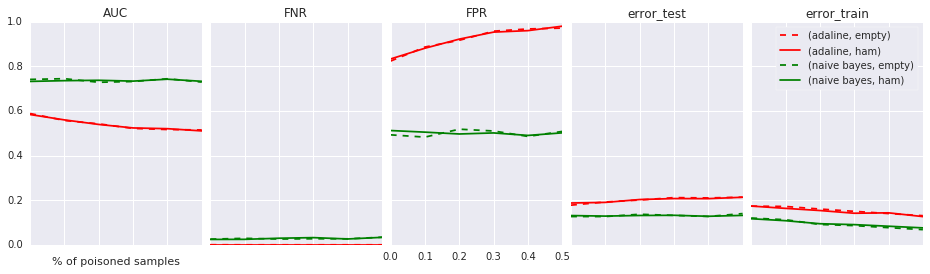

In [194]:
df_plot = df_mean.unstack(['classifier', 'attack'])
print(df_plot['AUC'])

from itertools import product
keys = list(product(*(list(names) for names in df_plot['AUC'].columns.levels)))
style = {}
for k in keys:
    color = 'r' if 'adaline' in k else 'g'
    ls = '-' if 'ham' in k else '--'
    style[k] = '%s%s' % (color, ls)

params = {
    'style': style,
    'ylim': (0, 1),
    'legend': None,
}

fig, axes = plt.subplots(nrows=1, ncols=len(df.columns), figsize=(16, 4))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

for i, metric in enumerate(df.columns):
    df_plot[metric].plot(ax=axes[i], title=metric, sharey=True, **params)
    axes[i].set_xticklabels([])
    axes[i].set_xlabel('')

axes[0].set_xlabel('% of poisoned samples')
axes[2].set_xticklabels(np.arange(0, 0.6, 0.1))
axes[-1].legend(frameon=True)

plt.show()